# Praktikum 7.1 - Contrast Enhancment

Import Library

In [12]:
import numpy as np  # Mengimpor modul numpy untuk operasi numerik yang efisien
import matplotlib.pyplot as plt  # Mengimpor modul matplotlib untuk membuat plot grafik

  # Memastikan plot grafik ditampilkan di dalam jupyter notebook
%matplotlib inline

import cv2  # Mengimpor modul cv2 untuk pengolahan gambar
import matplotlib.image as mpimg  # Mengimpor modul matplotlib.image untuk membaca dan menampilkan gambar
from skimage import data  # Mengimpor submodul data dari modul skimage untuk memuat contoh gambar


Read Image

In [13]:
image = cv2.imread("boneka2.tif", cv2.IMREAD_GRAYSCALE)

Penerapan Histogram Equalization (HE)

In [14]:
image_equalized = cv2.equalizeHist(image)

Penerapan Metode Contrast Limited Adaptive Histogram Equalization (CLAHE)

In [15]:
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))

#Apply CLAHE to the original image
image_clahe = clahe.apply(image)

Penerapan metode Contrast Stretching (CS)

In [16]:
# Create an empty array to store the final output
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8')
# Membuat array kosong dengan ukuran yang sama dengan gambar awal
# untuk menyimpan hasil keluaran akhir.
# Array ini akan diisi dengan kontras yang telah disesuaikan.

# Apply Min-Max Contrasting
min = np.min(image)
max = np.max(image)
# Menghitung nilai minimum (min) dan nilai maksimum (max) dari gambar.
# Nilai ini akan digunakan dalam perhitungan kontras Min-Max.

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        image_cs[i,j] = 255*(image[i,j]-min)/(max-min)
        # Menggunakan perulangan untuk mengakses setiap piksel dalam gambar.
        # Melakukan perhitungan kontras Min-Max pada setiap piksel dan
        # menyimpan hasilnya dalam array image_cs.
        # Rumus: image_cs = 255 * (image - min) / (max - min)


Penerapan Metode Perkalian Konstanta

In [17]:
copyCamera = image.copy().astype(float)  # Meng-copy gambar dan mengubah tipenya menjadi float

m1, n1 = copyCamera.shape  # Mendapatkan ukuran baris dan kolom dari gambar

output1 = np.empty([m1, n1])  # Membuat array kosong dengan ukuran yang sama dengan gambar

for baris in range(0, m1-1):  # Iterasi melalui setiap baris dalam gambar
    for kolom in range(0, n1-1):  # Iterasi melalui setiap kolom dalam gambar
        a1 = baris  # Menyimpan nilai baris saat ini
        b1 = kolom  # Menyimpan nilai kolom saat ini
        
        output1[a1, b1] = copyCamera[baris, kolom] * 1.9  # Mengalikan nilai piksel dalam gambar dengan 1.9 dan menyimpannya di output1


Plot Image

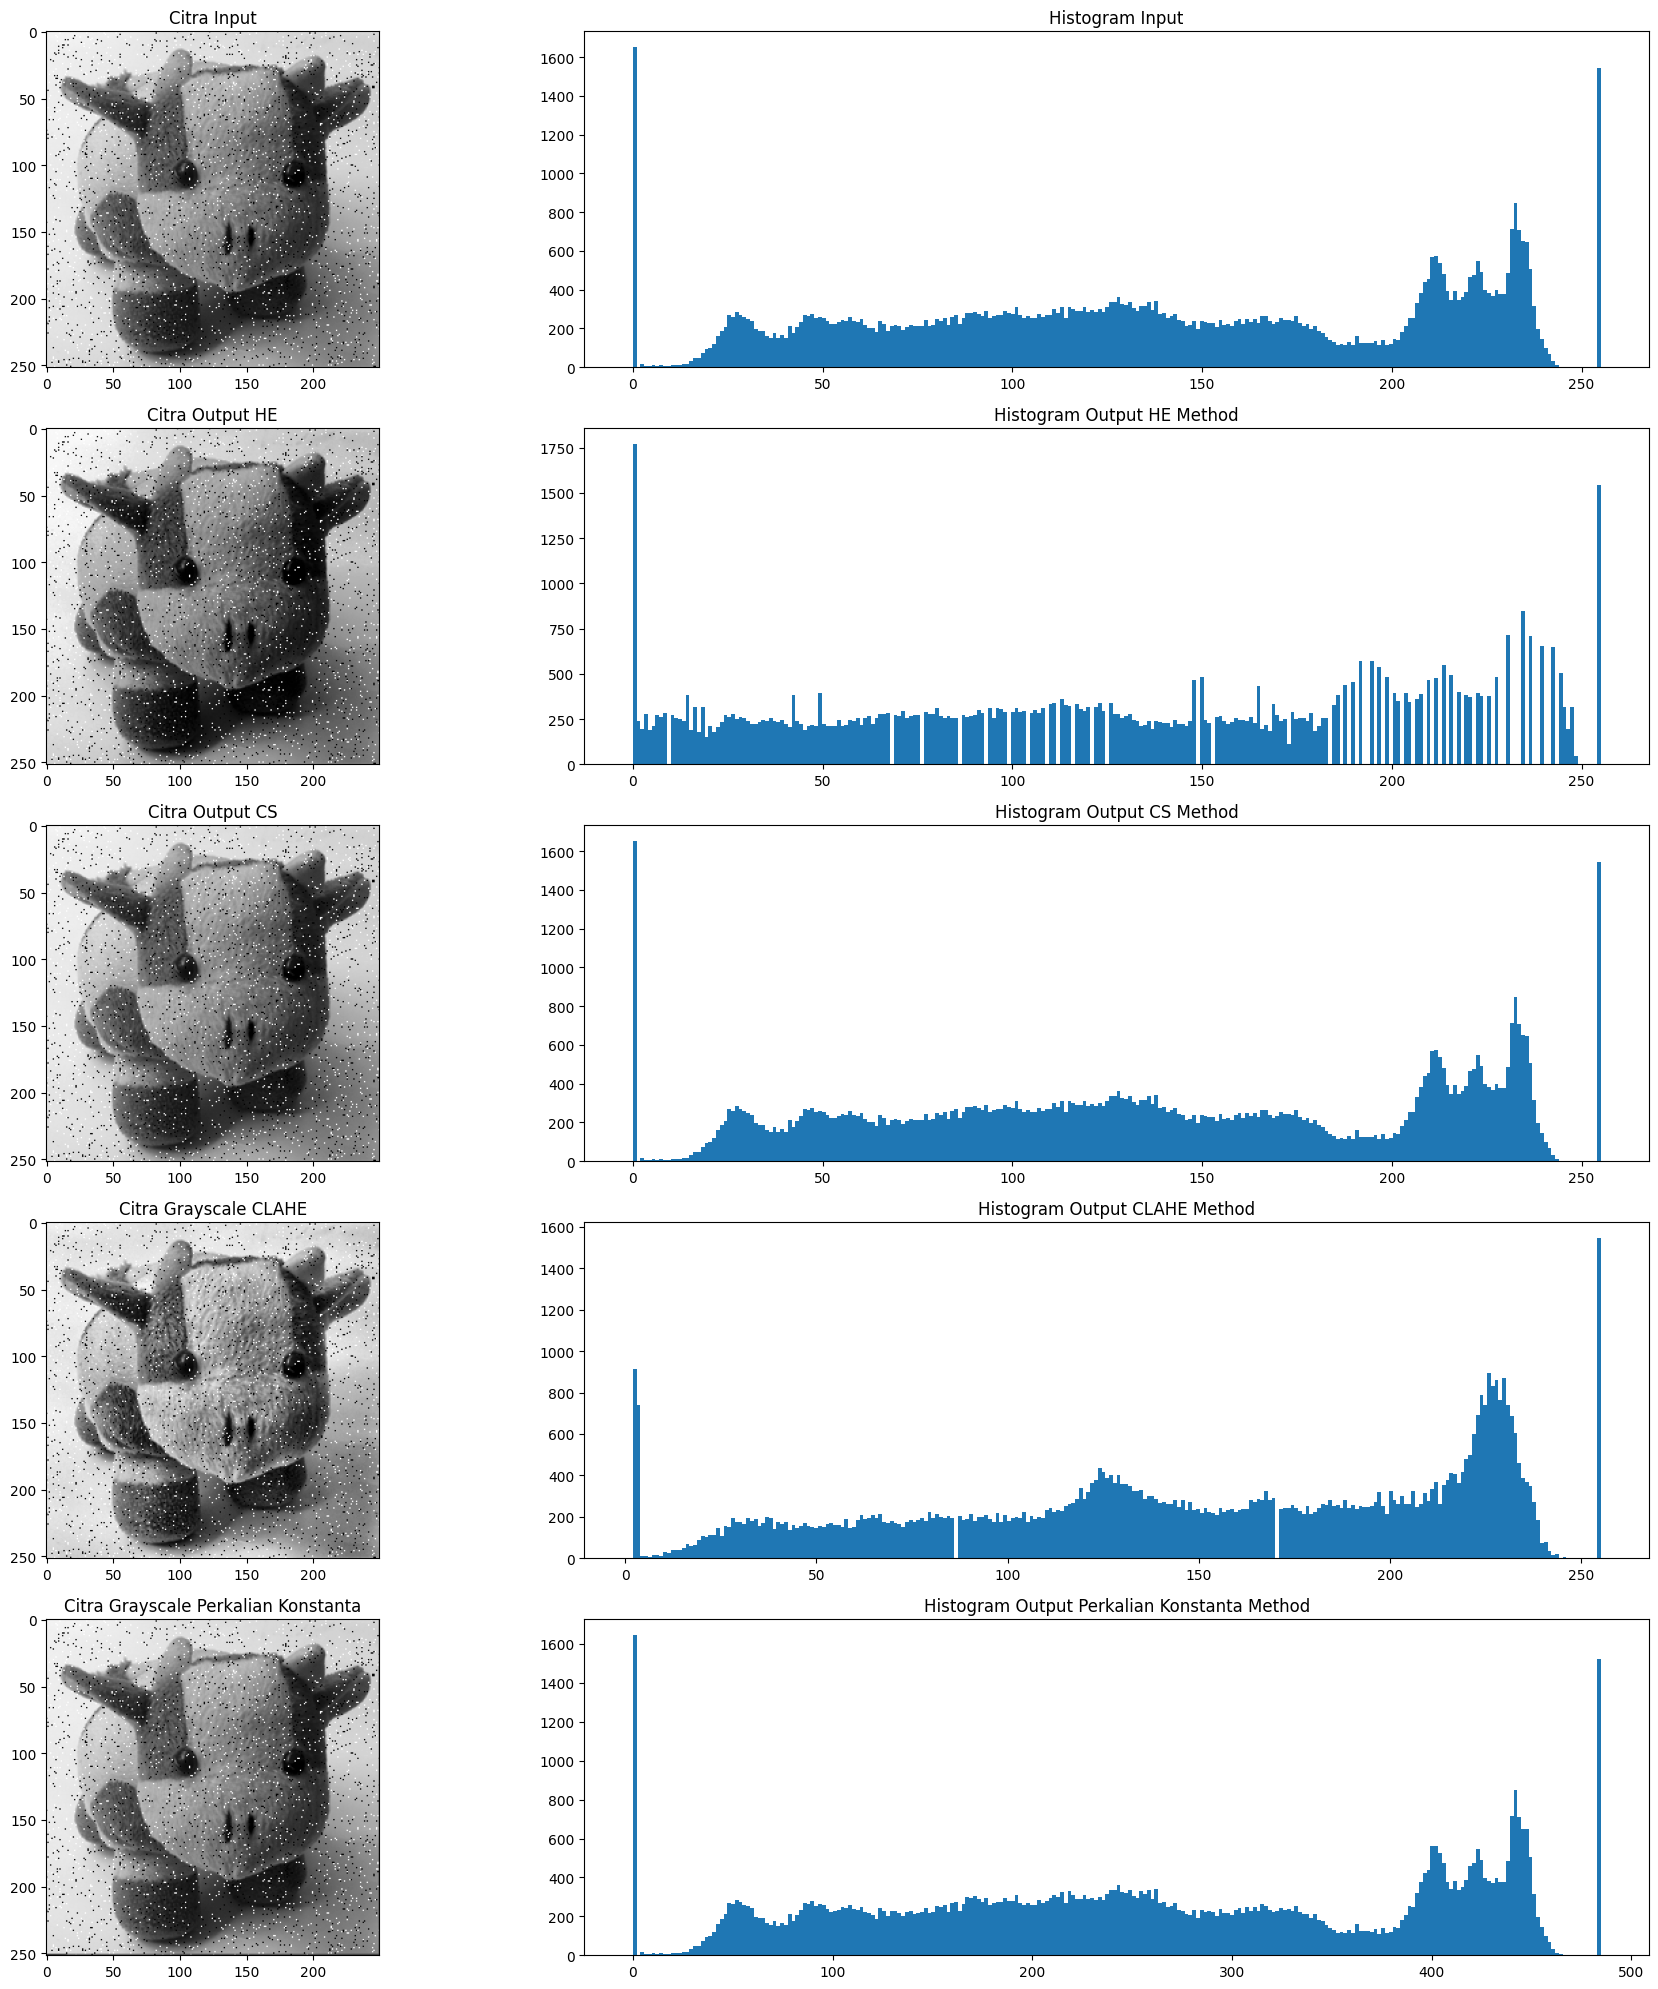

In [18]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))  # Membuat subplot dengan ukuran 5x2 dan ukuran gambar total 20x20
ax = axes.ravel()  # Melakukan perataan (flattening) pada array axes

ax[0].imshow(image, cmap=plt.cm.gray)  # Menampilkan citra input pada subplot 0
ax[0].set_title("Citra Input")  # Mengatur judul subplot 0
ax[1].hist(image.ravel(), bins=256)  # Menampilkan histogram citra input pada subplot 1
ax[1].set_title('Histogram Input')  # Mengatur judul subplot 1

ax[2].imshow(image_equalized, cmap=plt.cm.gray)  # Menampilkan citra hasil equalisasi histogram pada subplot 2
ax[2].set_title("Citra Output HE")  # Mengatur judul subplot 2
ax[3].hist(image_equalized.ravel(), bins=256)  # Menampilkan histogram citra hasil equalisasi histogram pada subplot 3
ax[3].set_title('Histogram Output HE Method')  # Mengatur judul subplot 3

ax[4].imshow(image_cs, cmap=plt.cm.gray)  # Menampilkan citra hasil kontras stretching pada subplot 4
ax[4].set_title("Citra Output CS")  # Mengatur judul subplot 4
ax[5].hist(image_cs.ravel(), bins=256)  # Menampilkan histogram citra hasil kontras stretching pada subplot 5
ax[5].set_title('Histogram Output CS Method')  # Mengatur judul subplot 5

ax[6].imshow(image_clahe, cmap=plt.cm.gray)  # Menampilkan citra hasil CLAHE pada subplot 6
ax[6].set_title("Citra Grayscale CLAHE")  # Mengatur judul subplot 6
ax[7].hist(image_clahe.ravel(), bins=256)  # Menampilkan histogram citra hasil CLAHE pada subplot 7
ax[7].set_title('Histogram Output CLAHE Method')  # Mengatur judul subplot 7

ax[8].imshow(output1, cmap=plt.cm.gray)  # Menampilkan citra hasil perkalian konstanta pada subplot 8
ax[8].set_title("Citra Grayscale Perkalian Konstanta")  # Mengatur judul subplot 8
ax[9].hist(output1.ravel(), bins=256)  # Menampilkan histogram citra hasil perkalian konstanta pada subplot 9
ax[9].set_title('Histogram Output Perkalian Konstanta Method')  # Mengatur judul subplot 9

fig.tight_layout()  # Mengatur tata letak subplot agar rapi
